Stephanie 

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR, DynamicVAR

/Users/stephanier/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
youtube_econ = pd.read_csv("../data/youtube_econ.csv",index_col=0)

In [4]:
youtube_econ = youtube_econ.fillna(method='ffill')

In [5]:
youtube_econ.index = pd.to_datetime(youtube_econ.Date)

In [6]:
youtube_econ = youtube_econ.drop(['Date'], axis=1)

In [7]:
youtube_econ.head()

,views,likes,dislikes,comment_count,s&p_Open,s&p_High,s&p_Low,s&p_Close,s&p_Adj Close,s&p_Volume,...,etc_Low,etc_Close,etc_Adj Close,etc_Volume,btc_Open,btc_High,btc_Low,btc_Close,btc_Adj Close,btc_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-14,185435246,7637635,270876,691402,2577.750000,2579.659912,2566.560059,2578.870117,2578.870117,3.641760e+09,...,314.450012,334.720001,334.720001,256426287,6522.450195,6728.589844,6419.180176,6597.060059,6597.060059,634604991
2017-11-15,212445216,7601148,313577,709009,2569.449951,2572.840088,2557.449951,2564.620117,2564.620117,3.558890e+09,...,324.880005,331.200012,331.200012,171713343,6597.060059,7330.060059,6596.939941,7283.220215,7283.220215,922959468
2017-11-16,227365391,7886807,338755,735962,2572.949951,2590.090088,2572.949951,2585.639893,2585.639893,3.312710e+09,...,321.899994,330.320007,330.320007,157426941,7283.020020,7964.640137,7119.169922,7853.680176,7853.680176,1010130763
2017-11-17,193541711,7143580,341176,814596,2582.939941,2583.959961,2577.620117,2578.850098,2578.850098,3.300160e+09,...,325.829987,331.720001,331.720001,124992568,7853.680176,8000.189941,7534.700195,7699.950195,7699.950195,917599923
2017-11-18,196846875,8393717,322349,901370,2582.939941,2583.959961,2577.620117,2578.850098,2578.850098,3.300160e+09,...,326.829987,346.649994,346.649994,141724984,7699.950195,7857.520020,7458.899902,7780.910156,7780.910156,571121111


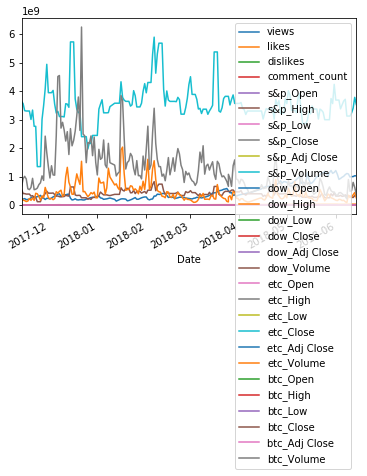

In [8]:
youtube_econ.plot()
plt.show()

In [10]:
youtube_econ = youtube_econ.astype(float)

In [12]:
#scale down the numbers of columns we will use.. create volatility column 
youtube_econ2 = youtube_econ[['views', 'likes','dislikes','comment_count','s&p_Close','dow_Close']]

In [13]:
youtube_econ2.head()

,views,likes,dislikes,comment_count,s&p_Close,dow_Close
Date,,,,,,
2017-11-14,185435246.0,7637635.0,270876.0,691402.0,2578.870117,23409.470703
2017-11-15,212445216.0,7601148.0,313577.0,709009.0,2564.620117,23271.279297
2017-11-16,227365391.0,7886807.0,338755.0,735962.0,2585.639893,23458.359375
2017-11-17,193541711.0,7143580.0,341176.0,814596.0,2578.850098,23358.240234
2017-11-18,196846875.0,8393717.0,322349.0,901370.0,2578.850098,23358.240234


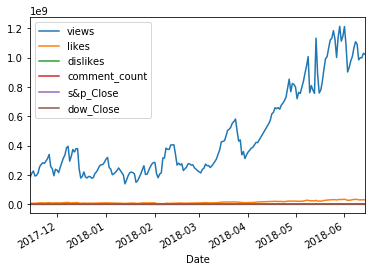

In [14]:
youtube_econ2.plot()
plt.show()

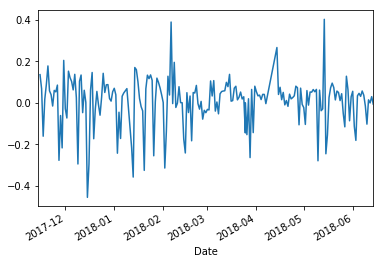

In [31]:
new = np.log(youtube_econ2).diff()
new['views'].plot()
plt.show()

After taking the log of the total views on a given day for Youtube's trending videos, the series still doesn't look stationary. 

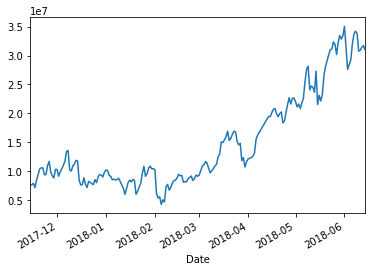

In [21]:
youtube_econ2['likes'].plot()
plt.show()

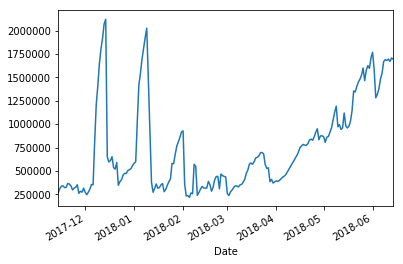

In [22]:
youtube_econ2['dislikes'].plot()
plt.show()

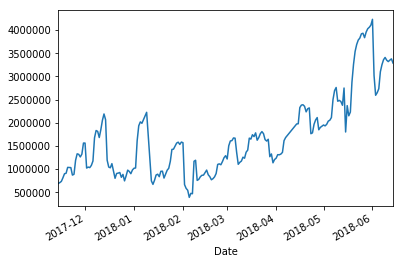

In [17]:
youtube_econ2['comment_count'].plot()
plt.show()

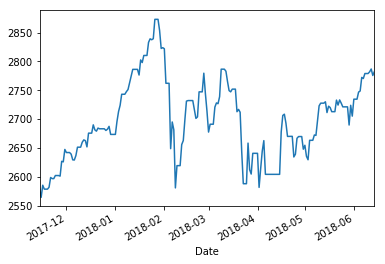

In [19]:
youtube_econ2['s&p_Close'].plot()
plt.show()

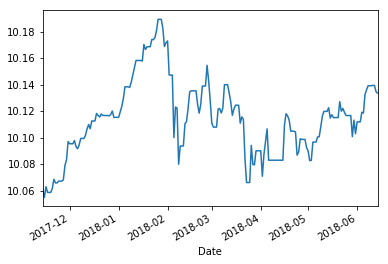

In [33]:
np.log(youtube_econ2['dow_Close']).plot()
plt.show()

Time series are in different scales, need to fix this. 

In [42]:
data = np.log(youtube_econ2).diff().dropna()

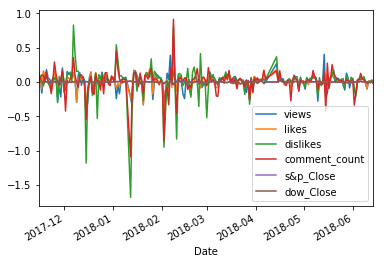

In [43]:
data.plot()
plt.show()

In [44]:
data.head()

,views,likes,dislikes,comment_count,s&p_Close,dow_Close
Date,,,,,,
2017-11-15,0.135978,-0.004789,0.146384,0.025147,-0.005541,-0.005921
2017-11-16,0.067874,0.036892,0.077232,0.037310,0.008163,0.008007
2017-11-17,-0.161065,-0.098977,0.007121,0.101514,-0.002629,-0.004277
2017-11-18,0.016933,0.161269,-0.056764,0.101224,0.000000,0.000000
2017-11-19,0.088455,0.111403,0.008104,0.009985,0.000000,0.000000


In [49]:
model = VAR(data)

results = model.fit(2)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 29, Nov, 2018
Time:                     18:47:24
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -38.8765
Nobs:                     205.000    HQIC:                  -39.6294
Log likelihood:           2447.14    FPE:                3.69407e-18
AIC:                     -40.1408    Det(Omega_mle):     2.55440e-18
--------------------------------------------------------------------
Results for equation views
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.008259         0.008070            1.023           0.307
L1.views                 0.070850         0.135072            0.525           0.601
L1.likes                -0.151957         0.2090

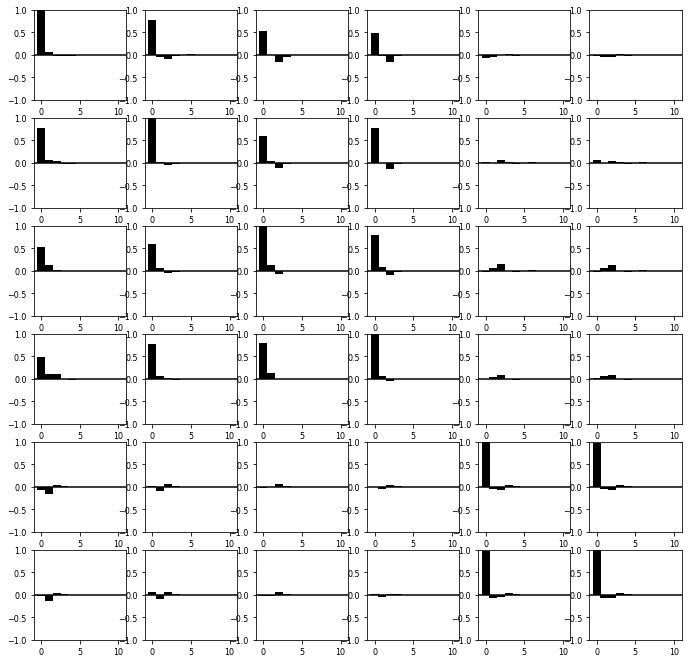

In [46]:
results.plot_acorr()
plt.show()

In [47]:
print(model.select_order(15))

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0       -40.34*      -40.24*   3.011e-18*      -40.30*
1        -40.17       -39.46    3.591e-18       -39.88
2        -40.08       -38.75    3.943e-18       -39.54
3        -40.02       -38.09    4.181e-18       -39.24
4        -39.74       -37.20    5.551e-18       -38.71
5        -39.50       -36.34    7.132e-18       -38.22
6        -39.37       -35.61    8.199e-18       -37.85
7        -39.35       -34.97    8.552e-18       -37.57
8        -39.23       -34.24    9.836e-18       -37.21
9        -39.13       -33.53    1.122e-17       -36.86
10       -39.04       -32.83    1.276e-17       -36.52
11       -38.92       -32.10    1.506e-17       -36.16
12       -38.81       -31.38    1.773e-17       -35.80
13       -38.74       -30.69    2.052e-17       -35.48
14       -38.81       -30.16    2.068e-17       -35.31
15       -

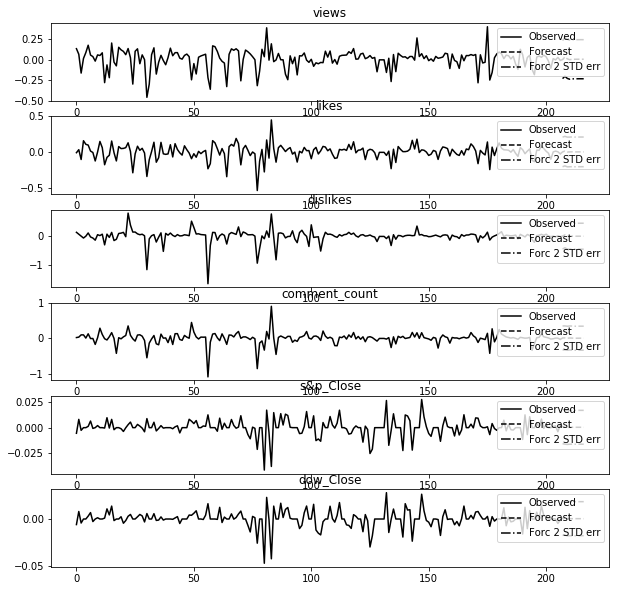

In [50]:
results.plot_forecast(10)
plt.show()

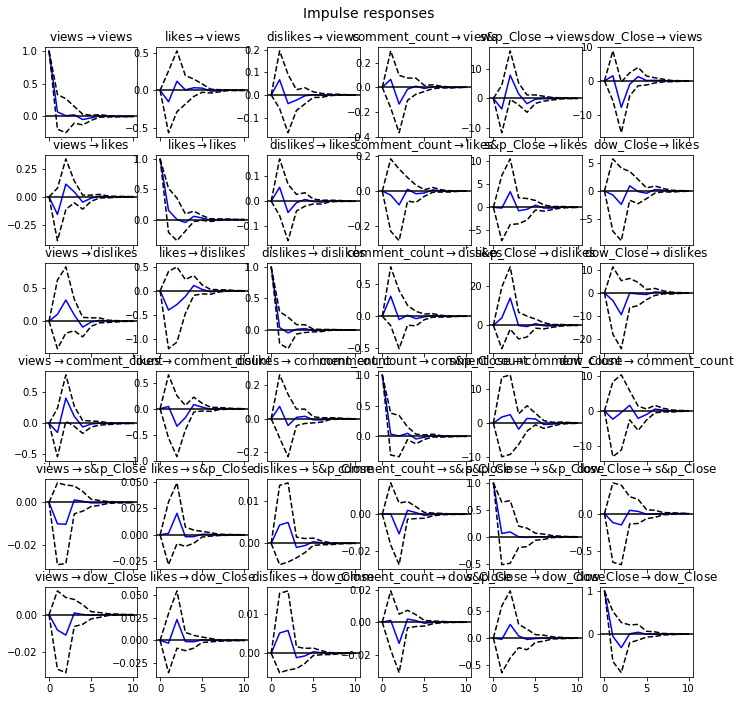

In [51]:
irf = results.irf(10)
irf.plot(orth=False)
plt.show()

Given the not so meaningful results of the VAR, I think if we want to use this it would be better if we had daily data that could better explain the views on a given day (Netflix streaming data for example).

It could be interesting to look at the views in a European country and see if the weather has an affect on Youtube views. 

In [52]:
#get youtube data for great britain
gb_data = pd.read_csv("../data/GBvideos.csv")